
# Project: Investigate a Dataset - Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This project report analyses **the popularity of movie genres** from the data provided on the google doc.[here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True)

> The main pupose of this analysis is to **investigate the popularity of movie genres**, and to find out if a certain **movie genres** gives the **highest revenue** compared to others.

### Question(s) for Analysis
>**1**: Do the movie genres with high popularity generate high revenue?

>**3**: Do popular movie genres receive more votes than unpopular ones?

>**4**: Do budget adjustments affect the popularity of the movies?

## importing Module  

Modules are imported below for loading, assessing, cleaning, analysing and visualizingdata. 

In [1]:
# Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section I have to collect data, assess it for null values, duplicates, and outliers. After that I will clean it for easy and better analysis.

### General Properties
> This data is in csv file. As the first step, I will load the file into DataFrame, and call it df_movies.

In [2]:
# Now it's time to load tmdb_movie.csv dataset
df_movies = pd.read_csv('tmdb_movies.csv')

# viewing dataframe to check for success

df_movies.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Performing an operation to identify the number of raws and columns for this data

df_movies.shape

(10866, 21)

In [4]:
# Perform an operation to inspect data types

df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# I will print all columns to check for their index

for i,v in enumerate(df_movies):
    print(i,v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [6]:
#Let me select the columns that am very interested in for anwering my questions

new_movie_df = df_movies.iloc[:, np.r_[2:5, 13, 16:18, 19:21]]


new_movie_df.head()


,popularity,budget,revenue,genres,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Action|Crime|Thriller,2947,7.3,1.747999e+08,1.385749e+09


In [7]:
#I Will save my new dataset as tmdb_movies_updated.csv inorder to be used in data cleaning section below.

new_movie_df.to_csv('tmdb_movies_updated.csv', index=False)

# Data Cleaning Section

> I will start by Re-loading the edited file into the Dataframe

In [8]:
# loading tmdb_movies_updated.csv

updated_movies = pd.read_csv('tmdb_movies_updated.csv')

# Viewing dataframe to check for success
updated_movies.head()

,popularity,budget,revenue,genres,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Action|Crime|Thriller,2947,7.3,1.747999e+08,1.385749e+09


In [9]:
# Checking for the shape of my dataset

new_movie_df.shape

(10866, 8)

In [10]:
# Now its time to check for missing values in the dataset
updated_movies.isnull().sum()

popularity       0
budget           0
revenue          0
genres          23
vote_count       0
vote_average     0
budget_adj       0
revenue_adj      0
dtype: int64

In [11]:
#Let me check for duplicated value
updated_movies.duplicated().sum()

1

#### Drop null values in dataset and dublicates in the Dataset

In [12]:
#Dropping missing values

updated_movies.dropna(inplace=True)

In [13]:
#Dropping the duplicated values

updated_movies.drop_duplicates(inplace=True)

# Viewing dataframe to check for success
updated_movies.head()

,popularity,budget,revenue,genres,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Action|Crime|Thriller,2947,7.3,1.747999e+08,1.385749e+09


In [14]:
# checking the shape of dataset after dropping missing and duplicated values.

updated_movies.shape

(10842, 8)

In [15]:
# checking if indeed the missing and duplicated values have been dropped

updated_movies.isnull().sum()

popularity      0
budget          0
revenue         0
genres          0
vote_count      0
vote_average    0
budget_adj      0
revenue_adj     0
dtype: int64

In [16]:
#For duplicated vlaues
updated_movies.duplicated().sum()

0

### Checking for outliers

In [17]:
#checking outliers using percentiles
updated_movies.describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99]).round(3)

,popularity,budget,revenue,vote_count,vote_average,budget_adj,revenue_adj
count,10842.000,1.084200e+04,1.084200e+04,10842.000,10842.000,1.084200e+04,1.084200e+04
mean,0.647,1.465531e+07,3.991138e+07,217.824,5.974,1.758712e+07,5.147797e+07
std,1.001,3.093971e+07,1.171179e+08,576.181,0.934,3.433437e+07,1.447723e+08
min,0.000,0.000000e+00,0.000000e+00,10.000,1.500,0.000000e+00,0.000000e+00
25%,0.208,0.000000e+00,0.000000e+00,17.000,5.400,0.000000e+00,0.000000e+00
50%,0.385,0.000000e+00,0.000000e+00,38.000,6.000,0.000000e+00,0.000000e+00
75%,0.715,1.500000e+07,2.414118e+07,146.000,6.600,2.092507e+07,3.387838e+07
95%,2.050,7.500000e+07,2.139530e+08,1027.000,7.400,8.939183e+07,2.774644e+08
99%,4.583,1.500000e+08,5.880376e+08,3020.900,7.900,1.623347e+08,6.988104e+08
max,32.986,4.250000e+08,2.781506e+09,9767.000,9.200,4.250000e+08,2.827124e+09


> Some features have noticable outliers, but looks okay to leave them as they are.

In data cleaning section, I identified 23 missing values within genres column, and because its hard to fillna of string datata
type, i decided to drop them all. I also observed 1 duplicated value which I also dropped it.

<a id='eda'></a>
## Exploratory Data Analysis

### Structure of My Dataset

> There are 10842 raws and 8 columns. The Genres are strings, revenue, vote_count and budget are integers, and the rest are floats. 

  - popularity 

  - budget 

  - revenue

  - genres

  - vote_count 

  - vote_average 

  - budget_adj 

  - revenue_adj   


  ### Statistical Description of the whole Dataset
    
> summarizing the statistical data using .describe()

In [18]:
#Statistical summary
updated_movies.describe()

,popularity,budget,revenue,vote_count,vote_average,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,217.823649,5.974064,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,576.180993,0.934257,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,146.000000,6.600000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,4.250000e+08,2.827124e+09


#### I will Visualize the dataset using histograms

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

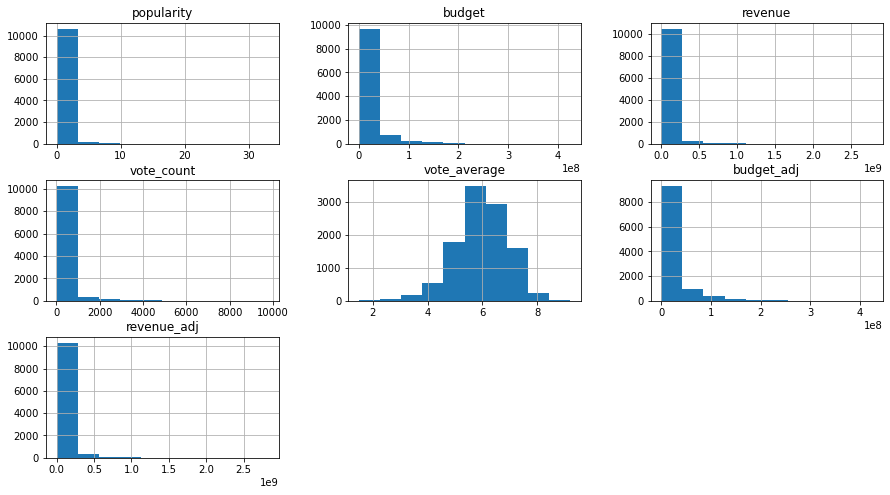

In [19]:
#histogram plots
updated_movies.hist(figsize=(15,8))

### Using Heat map to visualize correlations among the features

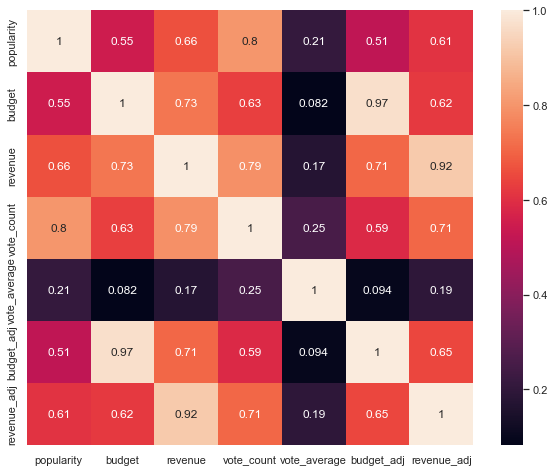

In [20]:
#Heat Map
corrMatrix = updated_movies.corr()
sns.set(rc={'figure.figsize': (10,8)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Research Question 1: Do the movie genres with high popularity generate high revenue?

> Lets first plot histogram of the "popularity" column to check popularity distribution

<Figure size 576x576 with 0 Axes>

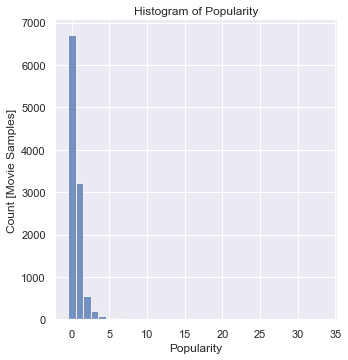

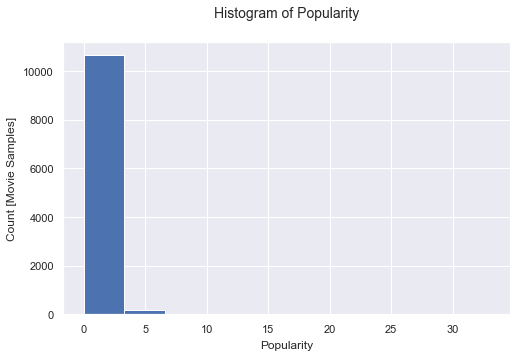

In [27]:
#histogram
plt.figure(figsize=[8, 8])
ax=sns.displot(updated_movies, x="popularity", discrete=True).set(title='Histogram of Popularity', xlabel='Popularity', 
                                                                 ylabel='Count [Movie Samples]');

plt.figure(figsize=[8, 5])
plt.hist(data = updated_movies, x = 'popularity');
plt.title('Histogram of Popularity', fontsize=14, y=1.07)
plt.xlabel('Popularity', labelpad=6, fontsize=12)
plt.ylabel('Count [Movie Samples]', labelpad=6, fontsize=12)
plt.show()

#### It seems the "popularity" has skewed distribution and because of this, I will use the median to measure its centre

In [126]:
#The median
updated_movies.popularity.median()

0.3845315

In [127]:
# Put data into two groups, namely: popular_genres, and unpopular_genres

popular_genres = updated_movies.query('popularity >= 0.38')
unpopular_genres = updated_movies.query('popularity < 0.38')

In [128]:
## To make sure that queries includes each sample exactly once, I will run the codes below and should return True

num_sample = updated_movies.shape[0]
num_sample == popular_genres['popularity'].count() + unpopular_genres['popularity'].count()

True

In [129]:
# Calculate mean revenue for the popular_genre group
print(popular_genres.revenue.mean())

75076630.0726776


In [130]:
# calculate mean revenue for unpopular_genre group
print(unpopular_genres.revenue.mean())

3839410.832585949


In [131]:
#### Am going to visualize above results to make it more understandable

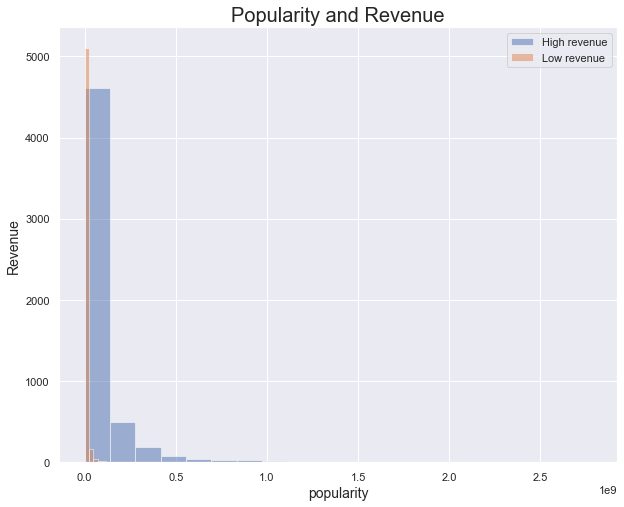

In [132]:
popular_genres.revenue.hist(alpha=0.5, bins=20, label='High revenue')
unpopular_genres.revenue.hist(alpha=0.5, bins=20, label='Low revenue')
plt.title('Popularity and Revenue', fontsize=20)
plt.xlabel('popularity', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.legend()

> It is now clear in the chart that more popular movie genres generate more revenue

##### Checking for correlations

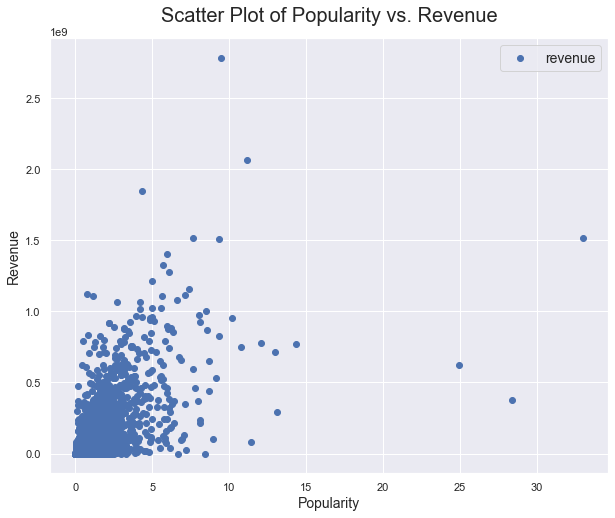

In [133]:
# I will visualize using scatter plot to check if there is correlation between movie genre popularity and revenue

plt.figure(figsize = [10, 8])
plt.scatter(data = updated_movies, x ='popularity' , y = 'revenue')
plt.title('Scatter Plot of Popularity vs. Revenue', fontsize= 20, y=1.025)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.legend(fontsize=14)
plt.show()

> There is positive correlation between popularity and revenue. This means as the popularity of movie genre increases,
> the revenue generation increases too.

### Research Question 2: Do popular movie genres receive more votes?

In [134]:
# Since I alredy know the popular and unpopular genres,
# I will just go ahead to Calculate mean vote count for the popular_genre and unpopular_genre groups

print(popular_genres.vote_count.mean())
print(unpopular_genres.vote_count.mean())

398.87267759562843
32.1063153961136


The popular movie genres have higher votes than unpopular movie genres

> popular_genres 

  - 399.01

> unpopular_genres

  - 32.12

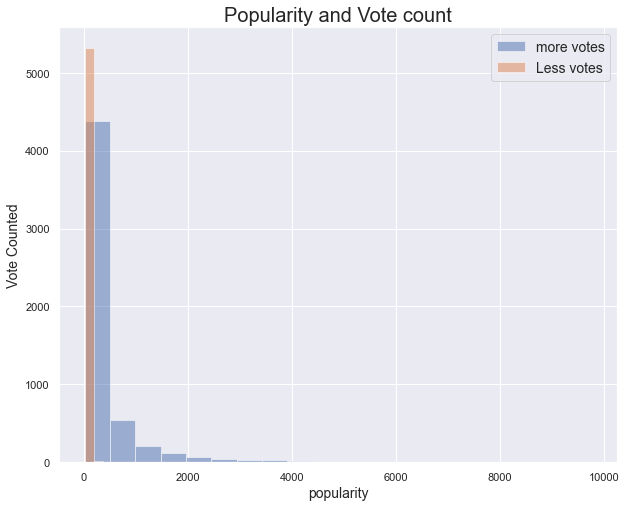

In [135]:
# lets visualize above results using histogram

popular_genres.vote_count.hist(alpha=0.5, bins=20, label='more votes')
unpopular_genres.vote_count.hist(alpha=0.5, bins=20, label='Less votes')
plt.title('Popularity and Vote count', fontsize=20)
plt.xlabel('popularity', fontsize=14)
plt.ylabel('Vote Counted', fontsize=14)
plt.legend(fontsize=14);

> We can see from the chart above that the more popular movie genres have more votes

##### Checking for correlations

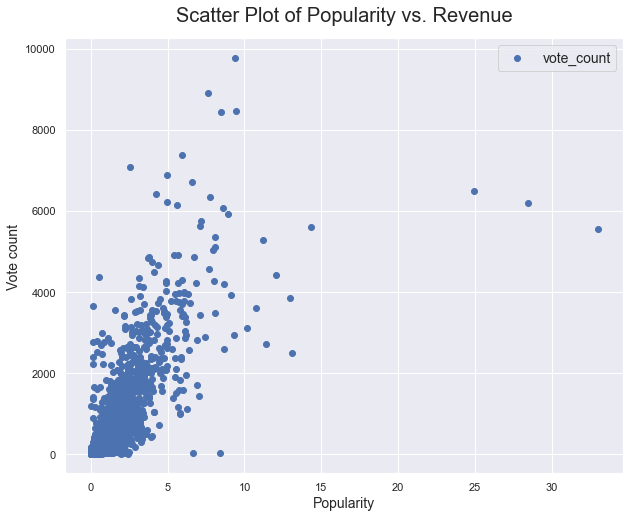

In [136]:
# I will visualize using scatter plot to check if there is correlation between movie genre popularity and vote counts

plt.figure(figsize = [10, 8])
plt.scatter(data = updated_movies, x ='popularity' , y = 'vote_count')
plt.title('Scatter Plot of Popularity vs. Revenue', fontsize= 20, y=1.025)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Vote count', fontsize=14)
plt.legend(fontsize=14)
plt.show()

> The visualization shows that there is strong positive correlation between movie genre popularity and vote counts

###### Now since the project explores three variables in relation to the primary question. Below will be looking at how these variables relate to each other.

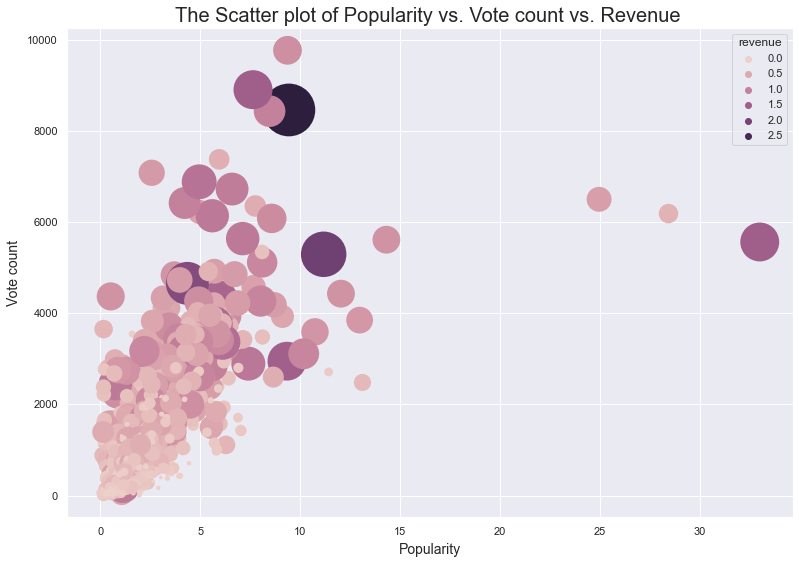

In [137]:
#plotting scatter plot Bubble size chart to visualize the relationship between population, vote counts and revenue
sns.set(rc={'figure.figsize': (13,9)})
sns.scatterplot(x = updated_movies['popularity'],
                y = updated_movies['vote_count'],
                hue = updated_movies['revenue'],
                s= updated_movies['revenue']/1000000)
plt.title('The Scatter plot of Popularity vs. Vote count vs. Revenue ', fontsize=20)

plt.xlabel('Popularity', labelpad=6, fontsize=14)
plt.ylabel('Vote count', labelpad=6, fontsize=14)
plt.show()

# Research Question 3: Do budget adjustments affect the popularity of the movies?

> Lets first plot histogram of the "Budget adjustment" column to check popularity distribution

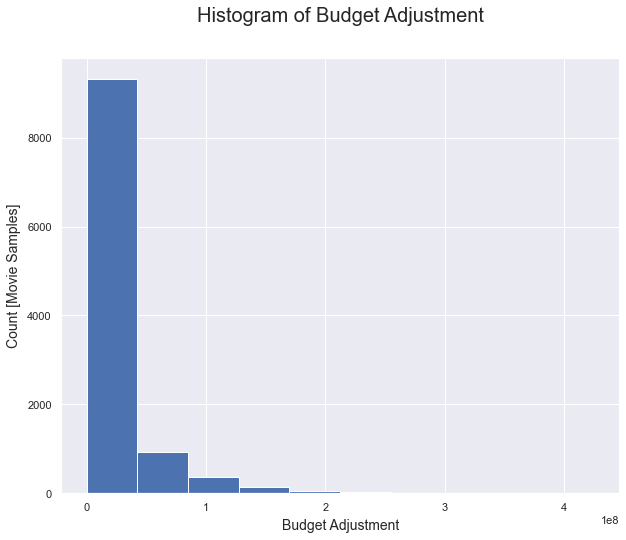

In [138]:
# Histogram for popularity

plt.figure(figsize=[10, 8])
plt.hist(data = updated_movies, x = 'budget_adj');
plt.title('Histogram of Budget Adjustment', fontsize=20, y=1.07)
plt.xlabel('Budget Adjustment', labelpad=6, fontsize=14)
plt.ylabel('Count [Movie Samples]', labelpad=6, fontsize=14)
plt.show()

Budget Adjustment also has skewed distribution, but its median is zero, so I will use the mean to measure its center

In [139]:
# mean
updated_movies.budget_adj.mean()

17587121.438262936

In [140]:
# Up data into two groups, namely: popular_genres, and unpopular_genres

high_budget = updated_movies.query('budget_adj >= 17600108.01')
low_budget = updated_movies.query('budget_adj < 17600108.01')

In [141]:
## To make sure that queries included each sample exactly once, I will run the codes below and should return True

num_sample = updated_movies.shape[0]
num_sample = popular_genres['budget_adj'].count() + unpopular_genres['budget_adj'].count()

In [142]:
# Calculate mean revenue for the popular_genre and unpopular_genre groups

print(high_budget.budget_adj.mean())
print(low_budget.budget_adj.mean())

58893742.938334346
1988229.5579309778


> High Budget Budget Adjustment

58893742.9383

> Low Budget Budget Adjustment

1990252.62693

In [ ]:
> lets try to visualize above results and see how the graph will look like. I will use histogram

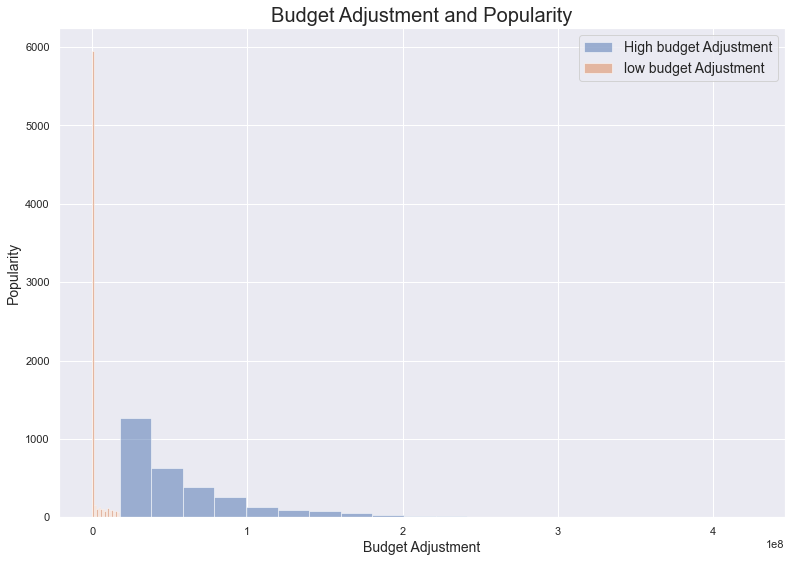

In [143]:
# Hist
high_budget.budget_adj.hist(alpha=0.5, bins=20, label='High budget Adjustment')
low_budget.budget_adj.hist(alpha=0.5, bins=20, label='low budget Adjustment')
plt.title('Budget Adjustment and Popularity', fontsize=20)
plt.xlabel('Budget Adjustment', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.legend(fontsize=14);

##### Checking for correlation

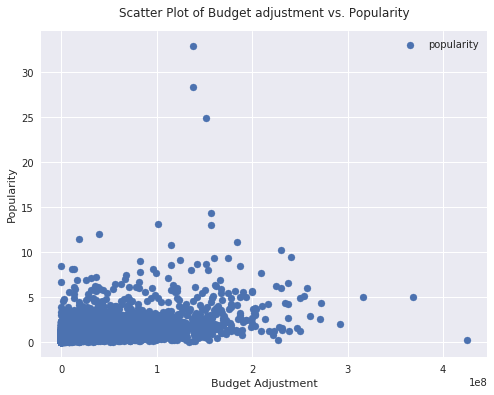

In [37]:
# I will visualize using scatter plot to check if there is correlation between Budget adjustment and popularity

plt.figure(figsize = [8, 6])
plt.scatter(data = updated_movies, x ='budget_adj' , y = 'popularity')
plt.title('Scatter Plot of Budget adjustment vs. Popularity', fontsize= 12, y=1.025)
plt.xlabel('Budget Adjustment')
plt.ylabel('Popularity')
plt.legend()
plt.show()

<a id='conclusions'></a>
## Conclusions

This report examined a dataset of Movie genres and preceived popularity, votes and  revenue samples. The aim was to figure out if the popularity of the movie genres correlate with the high revenue some movies generate. 

It was identified that both revenue and vote counts are highly affected by the popularity of the movie genres. both revenue and votes were positively correlated with popularity of movie genres, meaning that movie genres which are very popular generates more revenue and receive high votes.

The report also explored the effect of adjusting the budget on the popularity of the movie genres. The was positing correlation between budget adjustment and movie popularity, meaning if move budget is invested in the movie more popular it gets.

# Limitations

> In this project, there was no notecable limitations.

In [144]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

In [ ]:
Df = pd.read_